In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows=6868)

In [7]:
gdp_df[:6]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


In [8]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)
internet_df.tail(6)

,Country or Area,Year,Value,Value Footnotes
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


Look at the shape of each DataFrame - how many rows? How many columns?

In [9]:
internet_df.shape

(4495, 4)

In [10]:
gdp_df.shape

(6868, 4)

Take a look at the datatypes for the columns in each DataFrame.

In [11]:
type(gdp_df.columns)

pandas.core.indexes.base.Index

In [12]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [13]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

Take a look at the last 10 rows of each DataFrame in turn

In [14]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [15]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


Drop the `value footnotes` column from both DataFrames. Check that this worked as expected.

In [16]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [17]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [18]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [19]:
internet_df

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [20]:
## chris' version 
## gdp_df.rename(columns - {'Country or Area' : 'Country', 'Year': 'Year', 'Value' : "GDP_Per_Capita"})
 

In [21]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [22]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


10.	Merge the two DataFrames to one. Merge **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`.

In [23]:
## if they want all rows, use outer join...you don't have 
## enter what to merge on after how, but you should "on"

In [24]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='outer', on = ['Country', 'Year'])
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
...,...,...,...,...
7900,Yemen,1999,NaN,0.056629
7901,Yemen,1998,NaN,0.023323
7902,Yemen,1997,NaN,0.015025
7903,Yemen,1996,NaN,0.000621


Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [25]:
## Chris' Version
## years_subset = gdp_and_internet_use.loc[gdp_and_internet_use.Year.isin([2004,2009,2014])]

In [26]:
years_subset = gdp_and_internet_use[(gdp_and_internet_use.Year == 2004)|
                                    (gdp_and_internet_use.Year == 2009)|
                                   (gdp_and_internet_use.Year==2014)]
years_subset


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000
...,...,...,...,...
7868,Virgin Islands (U.S.),2009,NaN,27.396510
7873,Virgin Islands (U.S.),2004,NaN,27.377009
7885,Yemen,2014,NaN,22.550000
7890,Yemen,2009,NaN,9.960000


Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [27]:
## Chris' Version
##df_04 years.subset.loc[years_subset.Year == 2004]
##df_09 years.subset.loc[years_subset.Year == 2009]
##df_14 years.subset.loc[years_subset.Year == 2014]

In [28]:
df04 = years_subset[years_subset.Year == 2004]
df04

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
15,Afghanistan,2004,1200.278256,0.105809
33,Albania,2004,7604.838002,2.420388
63,Algeria,2004,10058.435939,4.634475
93,Angola,2004,5593.241537,0.464815
123,Antigua and Barbuda,2004,18745.681534,24.266544
...,...,...,...,...
7771,T.F.Y.R. Macedonia,2004,NaN,24.440000
7829,Venezuela,2004,NaN,8.404470
7853,Viet Nam,2004,NaN,7.642409
7873,Virgin Islands (U.S.),2004,NaN,27.377009


In [29]:
df09 = years_subset[years_subset.Year == 2009]
df09

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10,Afghanistan,2009,1758.904043,3.55000
28,Albania,2009,10346.864199,41.20000
58,Algeria,2009,10782.361398,11.23000
88,Angola,2009,7643.493749,6.00000
118,Antigua and Barbuda,2009,20046.839017,42.00000
...,...,...,...,...
7766,T.F.Y.R. Macedonia,2009,NaN,51.77000
7824,Venezuela,2009,NaN,32.70000
7848,Viet Nam,2009,NaN,26.55000
7868,Virgin Islands (U.S.),2009,NaN,27.39651


In [30]:
df14 = years_subset[years_subset.Year == 2014]
df14

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.39
23,Albania,2014,11623.866679,60.10
53,Algeria,2014,11512.705405,18.09
83,Angola,2014,8239.828837,21.26
113,Antigua and Barbuda,2014,18104.241470,64.00
...,...,...,...,...
7761,T.F.Y.R. Macedonia,2014,NaN,68.06
7819,Venezuela,2014,NaN,57.00
7843,Viet Nam,2014,NaN,48.31
7863,Virgin Islands (U.S.),2014,NaN,50.07


Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [31]:
## Chris' version
## df14.Internet_Users_Pct.max()

In [32]:
max(df14.Internet_Users_Pct)

98.16

In [33]:
## Chris' version THIS IS THE WAYYY
df14.loc[df14.Internet_Users_Pct == df14.Internet_Users_Pct.max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.1495,98.16


In [34]:
##brent's version
## biggun=df14.nlargest(1,['Internet_Users_Pct'])

In [35]:
df14.iloc[df14.Internet_Users_Pct.argmax(), 0:4]


Country                  Iceland
Year                        2014
GDP_Per_Capita        49652.1495
Internet_Users_Pct         98.16
Name: 2625, dtype: object

Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [36]:
df14.iloc[df14.Internet_Users_Pct.argmin(), 0:4]

Country               Dem. People's Rep. of Korea
Year                                         2014
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 7079, dtype: object

Repeat for 2004 and 2009

In [37]:
df04.iloc[df04.Internet_Users_Pct.argmax(), 0:4]

Country                     Sweden
Year                          2004
GDP_Per_Capita        44496.023401
Internet_Users_Pct           83.89
Name: 6019, dtype: object

In [38]:
df04.iloc[df04.Internet_Users_Pct.argmin(), 0:4]

Country               Dem. People's Rep. of Korea
Year                                         2004
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 7088, dtype: object

In [39]:
df09.iloc[df09.Internet_Users_Pct.argmax(), 0:4]

Country                    Iceland
Year                          2009
GDP_Per_Capita        48177.084123
Internet_Users_Pct            93.0
Name: 2630, dtype: object

In [40]:
df09.iloc[df09.Internet_Users_Pct.argmin(), 0:4]

Country               Dem. People's Rep. of Korea
Year                                         2009
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 7083, dtype: object

Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [41]:
df14.iloc[df14.GDP_Per_Capita.argmax(), 0:4]

Country               Macao SAR, China
Year                              2014
GDP_Per_Capita            156514.13385
Internet_Users_Pct                 NaN
Name: 3721, dtype: object

Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [42]:
df14.iloc[df14.GDP_Per_Capita.argmin(), 0:4]

Country               Central African Republic
Year                                      2014
GDP_Per_Capita                      822.610458
Internet_Users_Pct                         NaN
Name: 1047, dtype: object

Create some scatterplots:  
    a.  2004 Percent Using the Internet vs GDP Per Capita  

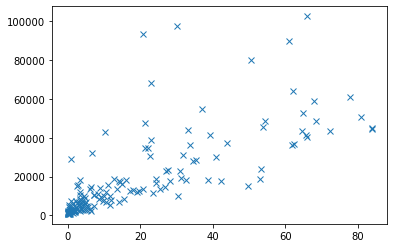

In [43]:
plt.plot(df04.Internet_Users_Pct, df04.GDP_Per_Capita, 'x')

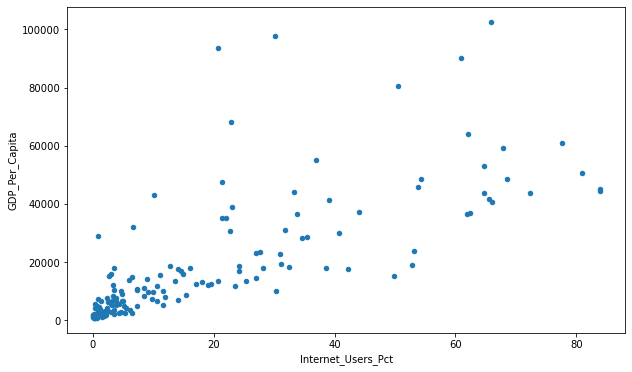

In [44]:
df04.plot(kind = 'scatter',
             x = 'Internet_Users_Pct',
             y = 'GDP_Per_Capita',
             figsize = (10,6));

2009 Percent Using the Internet vs GDP Per Capita  

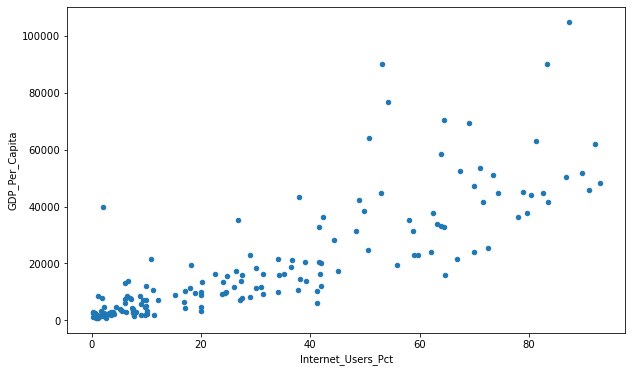

In [45]:
df09.plot(kind = 'scatter',
             x = 'Internet_Users_Pct',
             y = 'GDP_Per_Capita',
             figsize = (10,6));

2014 Percent Using the Internet vs GDP Per Capita

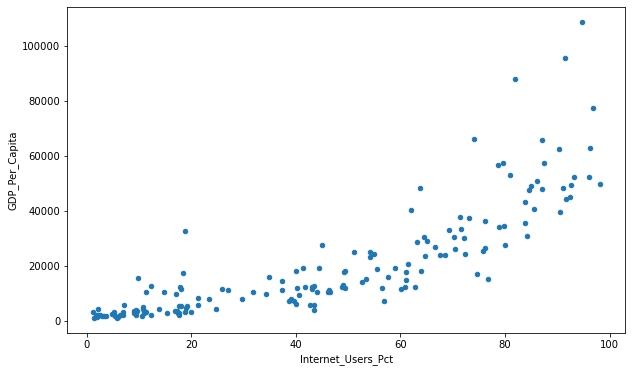

In [46]:
df14.plot(kind = 'scatter',
             x = 'Internet_Users_Pct',
             y = 'GDP_Per_Capita',
             figsize = (10,6));

Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

Less outliers as the years progressed. Internet was more accessible to countries as time as gone on.

Look at the distribution of gdp per capita values for 2014. Is it unimodal?

C:\Users\emmaj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Density'>

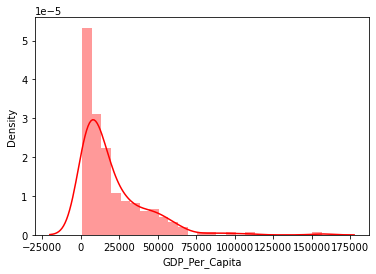

In [70]:
## Chris' Version sns.distplot(df14.GDP_Per_Capita,
                        bins = 25,
                        color = 'red')

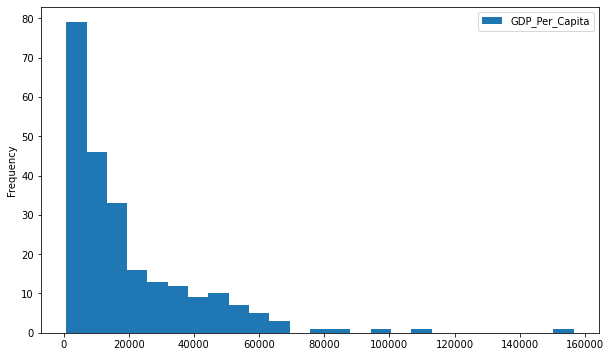

In [62]:
df14.plot(kind = 'hist',
              bins = 25,
             x = 'Internet_Users_Pct',
             y = 'GDP_Per_Capita',
             figsize = (10,6));

Look at the distribution of Internet Use for 2014. Is it unimodal?

^^yes

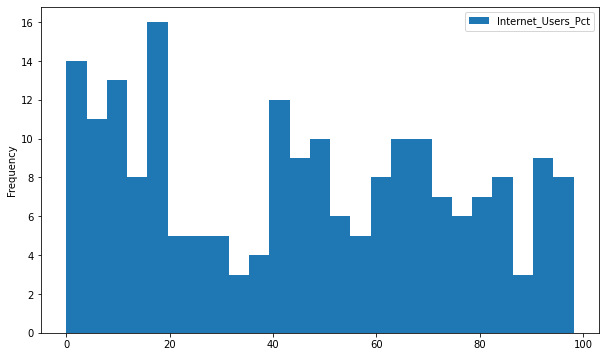

In [48]:
df14.plot(kind = 'hist',
              bins = 25,
             x = 'GDP_Per_Capita',
             y = 'Internet_Users_Pct',
             figsize = (10,6));

^^no

What are the top 5 countries in terms of internet use in 2014?

In [75]:
##Chris' version 
list(df14.sort_values(['Internet_Users_Pct'], ascending = False).head().Country)

['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra']

In [72]:
top_5_int_14 = df14.nlargest(n=5, columns=['Internet_Users_Pct'])
top_5_int_14

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6871,Andorra,2014,NaN,95.90


Create a DataFrame called top_5_internet **from the combined DataFrame that has all three years _for the 5 countries that had the greatest 2014 internet usage_**. You should have 15 rows. Check that this is true.

In [50]:
top_5_internet = years_subset[(years_subset.Country.isin(top_5_int_14.Country))]
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
561,Bermuda,2014,77361.104881,96.800000
566,Bermuda,2009,89961.982744,83.250000
571,Bermuda,2004,90195.811033,60.990867
1452,Denmark,2014,52214.537753,95.990000
1457,Denmark,2009,50274.075696,86.840000
1462,Denmark,2004,50607.628971,80.930000
2625,Iceland,2014,49652.149500,98.160000
2630,Iceland,2009,48177.084123,93.000000
2635,Iceland,2004,45145.545658,83.880000
4648,Norway,2014,62589.373548,96.300000


Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

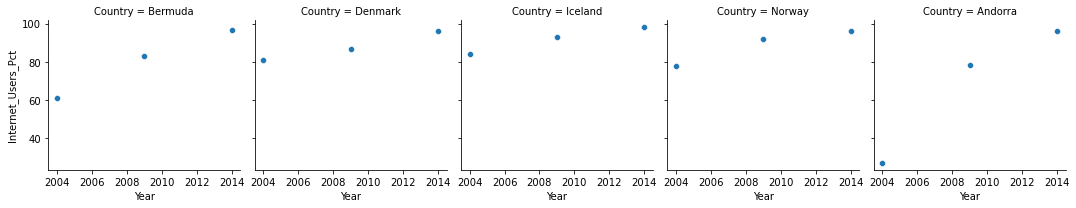

In [76]:
##Chris' Version
net = sns.FacetGrid(top_5_internet, col = 'Country')
net.map(sns.scatterplot, "Year", "Internet_Users_Pct")

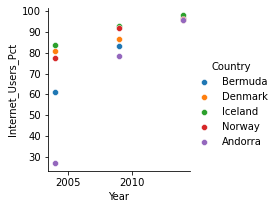

In [51]:
internetFG = sns.FacetGrid(top_5_internet, hue='Country')
internetFG.map(sns.scatterplot, 'Year', 'Internet_Users_Pct')
internetFG.add_legend()

Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [82]:
## Chris' version
sns.replot(data = top_5_internet,
           x= "Year",
            y = "Internet_Users_Pct",
           hue = "Country",
           kind = "line");

AttributeError: module 'seaborn' has no attribute 'replot'

In [52]:
lowest_internet = df14.nsmallest(n=5, columns=['Internet_Users_Pct'])
lowest_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7079,Dem. People's Rep. of Korea,2014,NaN,0.00
7137,Eritrea,2014,NaN,0.99
6219,Timor-Leste,2014,3264.568070,1.14
827,Burundi,2014,886.235777,1.38
7674,Somalia,2014,NaN,1.63


In [53]:
lowest_5_internet = years_subset[(years_subset.Country.isin(lowest_internet.Country))]
lowest_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
827,Burundi,2014,886.235777,1.380000
832,Burundi,2009,831.564131,0.900000
837,Burundi,2004,817.460585,0.349060
6219,Timor-Leste,2014,3264.568070,1.140000
6224,Timor-Leste,2009,2724.770973,0.185252
6229,Timor-Leste,2004,2258.608056,NaN
7079,Dem. People's Rep. of Korea,2014,NaN,0.000000
7083,Dem. People's Rep. of Korea,2009,NaN,0.000000
7088,Dem. People's Rep. of Korea,2004,NaN,0.000000
7137,Eritrea,2014,NaN,0.990000


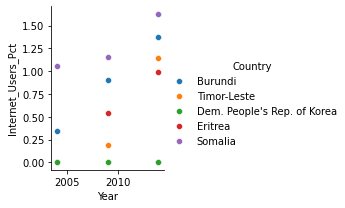

In [54]:
internetFG = sns.FacetGrid(lowest_5_internet, hue='Country')
internetFG.map(sns.scatterplot, 'Year', 'Internet_Users_Pct')
internetFG.add_legend()

Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

In [55]:
top_5_gdp_14 = df14.nlargest(n=5, columns=['GDP_Per_Capita'])
top_5_gdp_14

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3721,"Macao SAR, China",2014,156514.133850,NaN
3691,Luxembourg,2014,108760.916030,94.67
5138,Qatar,2014,95578.416973,91.49
5464,Singapore,2014,87808.663157,82.00
561,Bermuda,2014,77361.104881,96.80


In [56]:
top_5_gdp = years_subset[(years_subset.Country.isin(top_5_gdp_14.Country))]
top_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
561,Bermuda,2014,77361.104881,96.800000
566,Bermuda,2009,89961.982744,83.250000
571,Bermuda,2004,90195.811033,60.990867
3691,Luxembourg,2014,108760.916030,94.670000
3696,Luxembourg,2009,104932.811953,87.310000
3701,Luxembourg,2004,102708.212547,65.880000
3721,"Macao SAR, China",2014,156514.133850,NaN
3726,"Macao SAR, China",2009,95939.340822,NaN
3731,"Macao SAR, China",2004,72944.409424,NaN
5138,Qatar,2014,95578.416973,91.490000


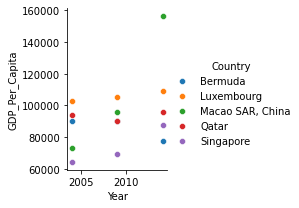

In [57]:
gdpFG = sns.FacetGrid(top_5_gdp, hue='Country')
gdpFG.map(sns.scatterplot, 'Year', 'GDP_Per_Capita')
gdpFG.add_legend()

Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

In [58]:
bottom_5_gdp_14 = df14.nsmallest(n=5, columns=['GDP_Per_Capita'])
bottom_5_gdp_14

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1047,Central African Republic,2014,822.610458,NaN
827,Burundi,2014,886.235777,1.38
3781,Malawi,2014,1027.208496,5.83
1422,Dem. Rep. Congo,2014,1029.790785,NaN
4528,Niger,2014,1127.615541,1.95


In [59]:
bottom_5_gdp = years_subset[(years_subset.Country.isin(bottom_5_gdp_14.Country))]
bottom_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
827,Burundi,2014,886.235777,1.380000
832,Burundi,2009,831.564131,0.900000
837,Burundi,2004,817.460585,0.349060
1047,Central African Republic,2014,822.610458,NaN
1052,Central African Republic,2009,1161.189475,NaN
1057,Central African Republic,2004,1037.846766,NaN
1422,Dem. Rep. Congo,2014,1029.790785,NaN
1427,Dem. Rep. Congo,2009,835.611696,NaN
1432,Dem. Rep. Congo,2004,757.685942,NaN
3781,Malawi,2014,1027.208496,5.830000


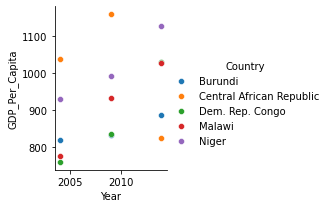

In [60]:
gdpFG = sns.FacetGrid(bottom_5_gdp, hue='Country')
gdpFG.map(sns.scatterplot, 'Year', 'GDP_Per_Capita')
gdpFG.add_legend()